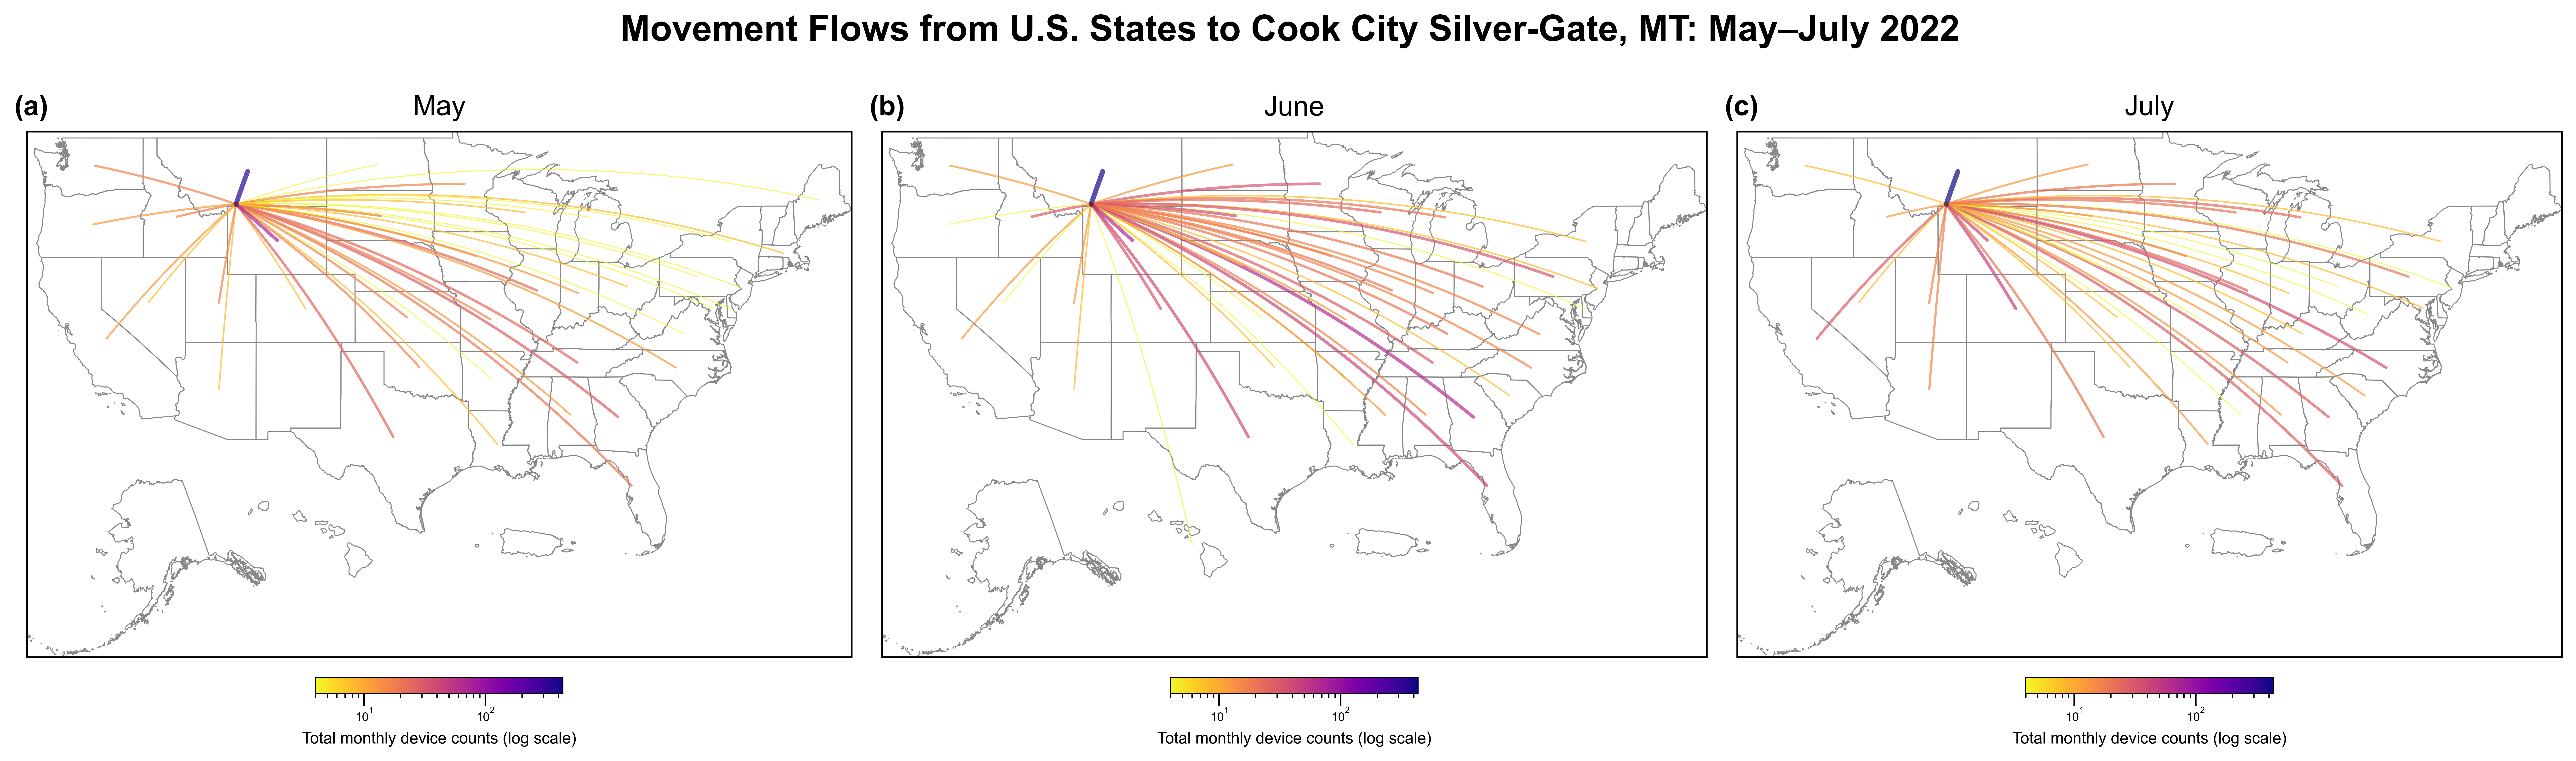

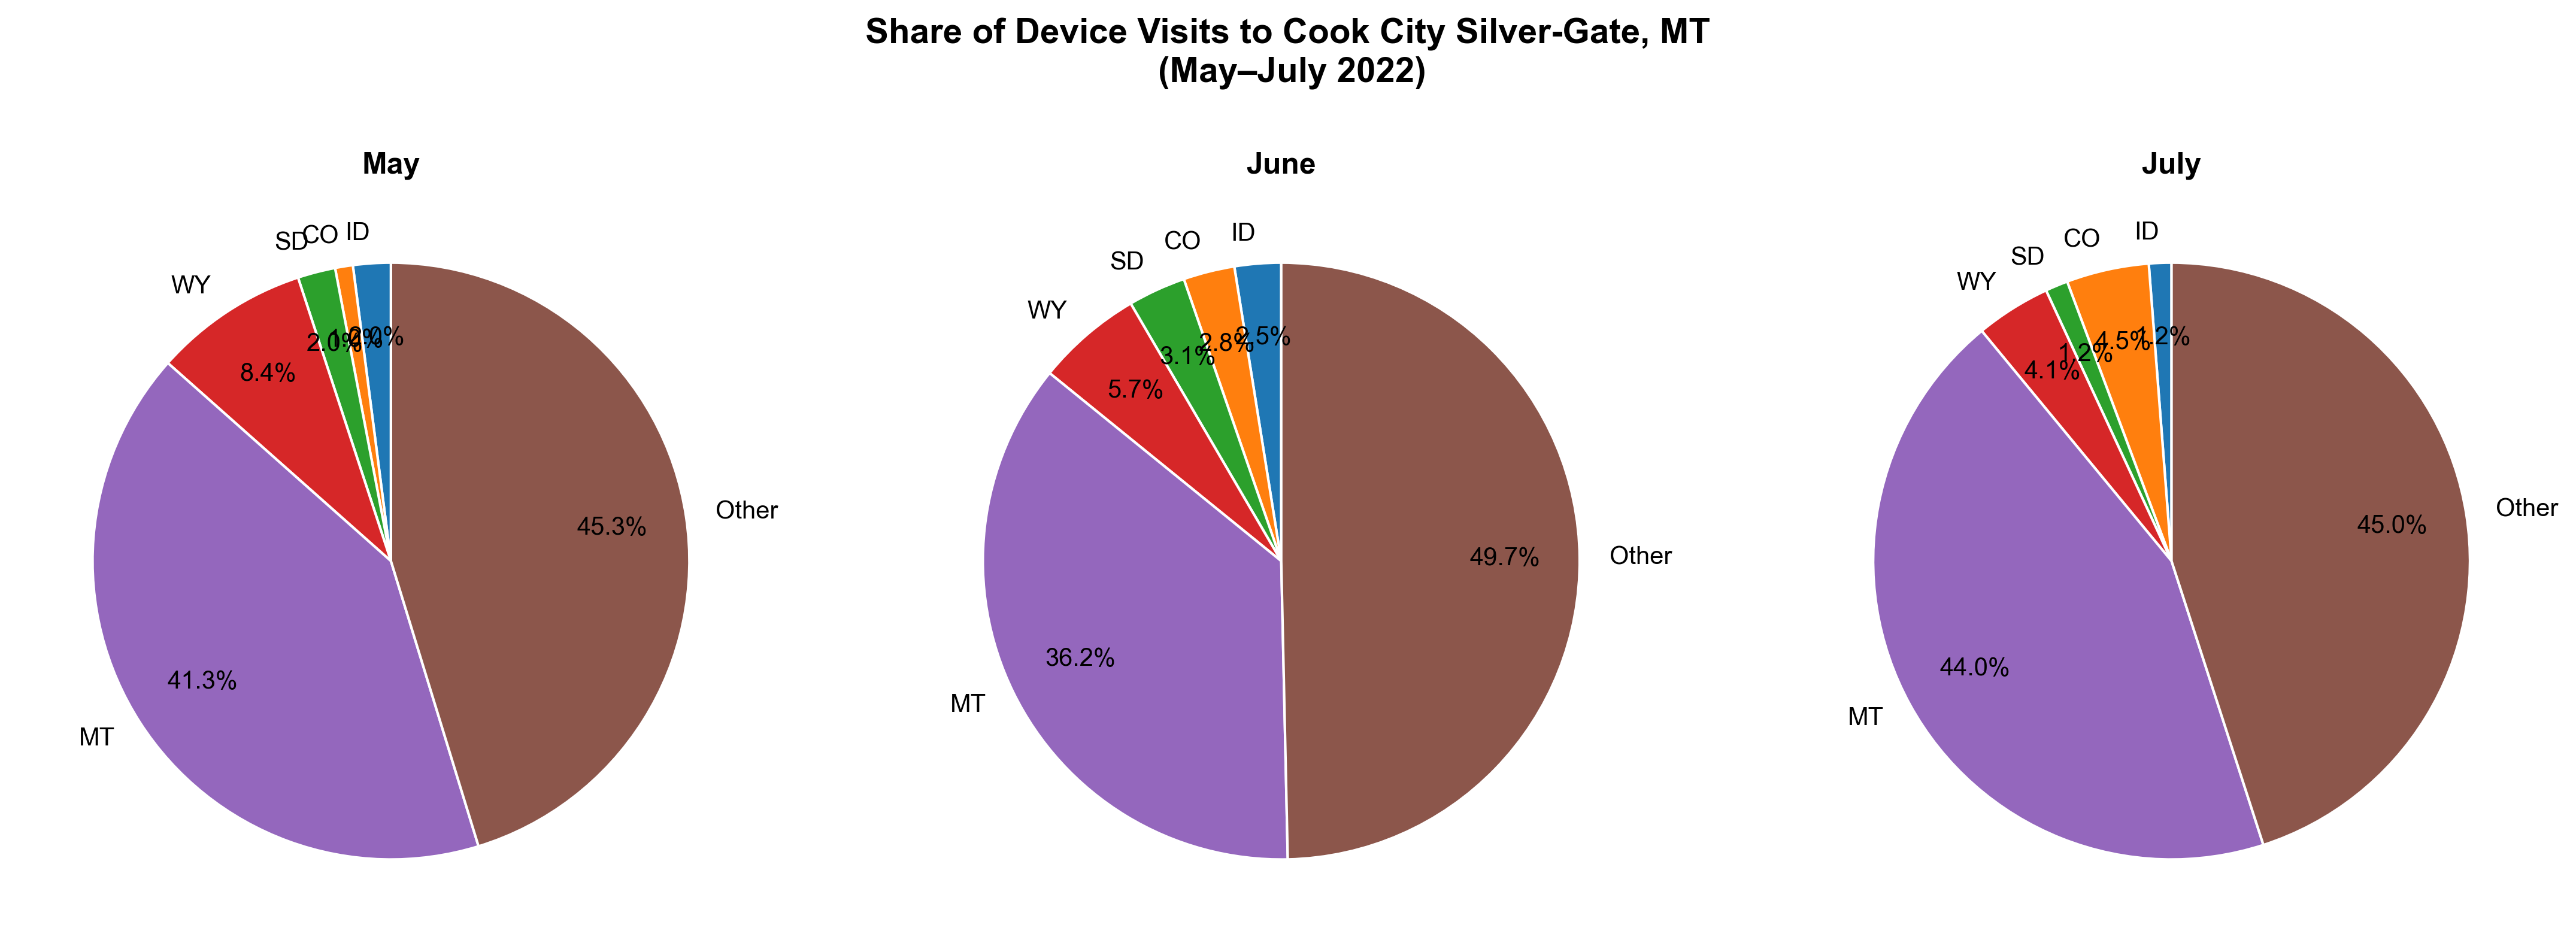

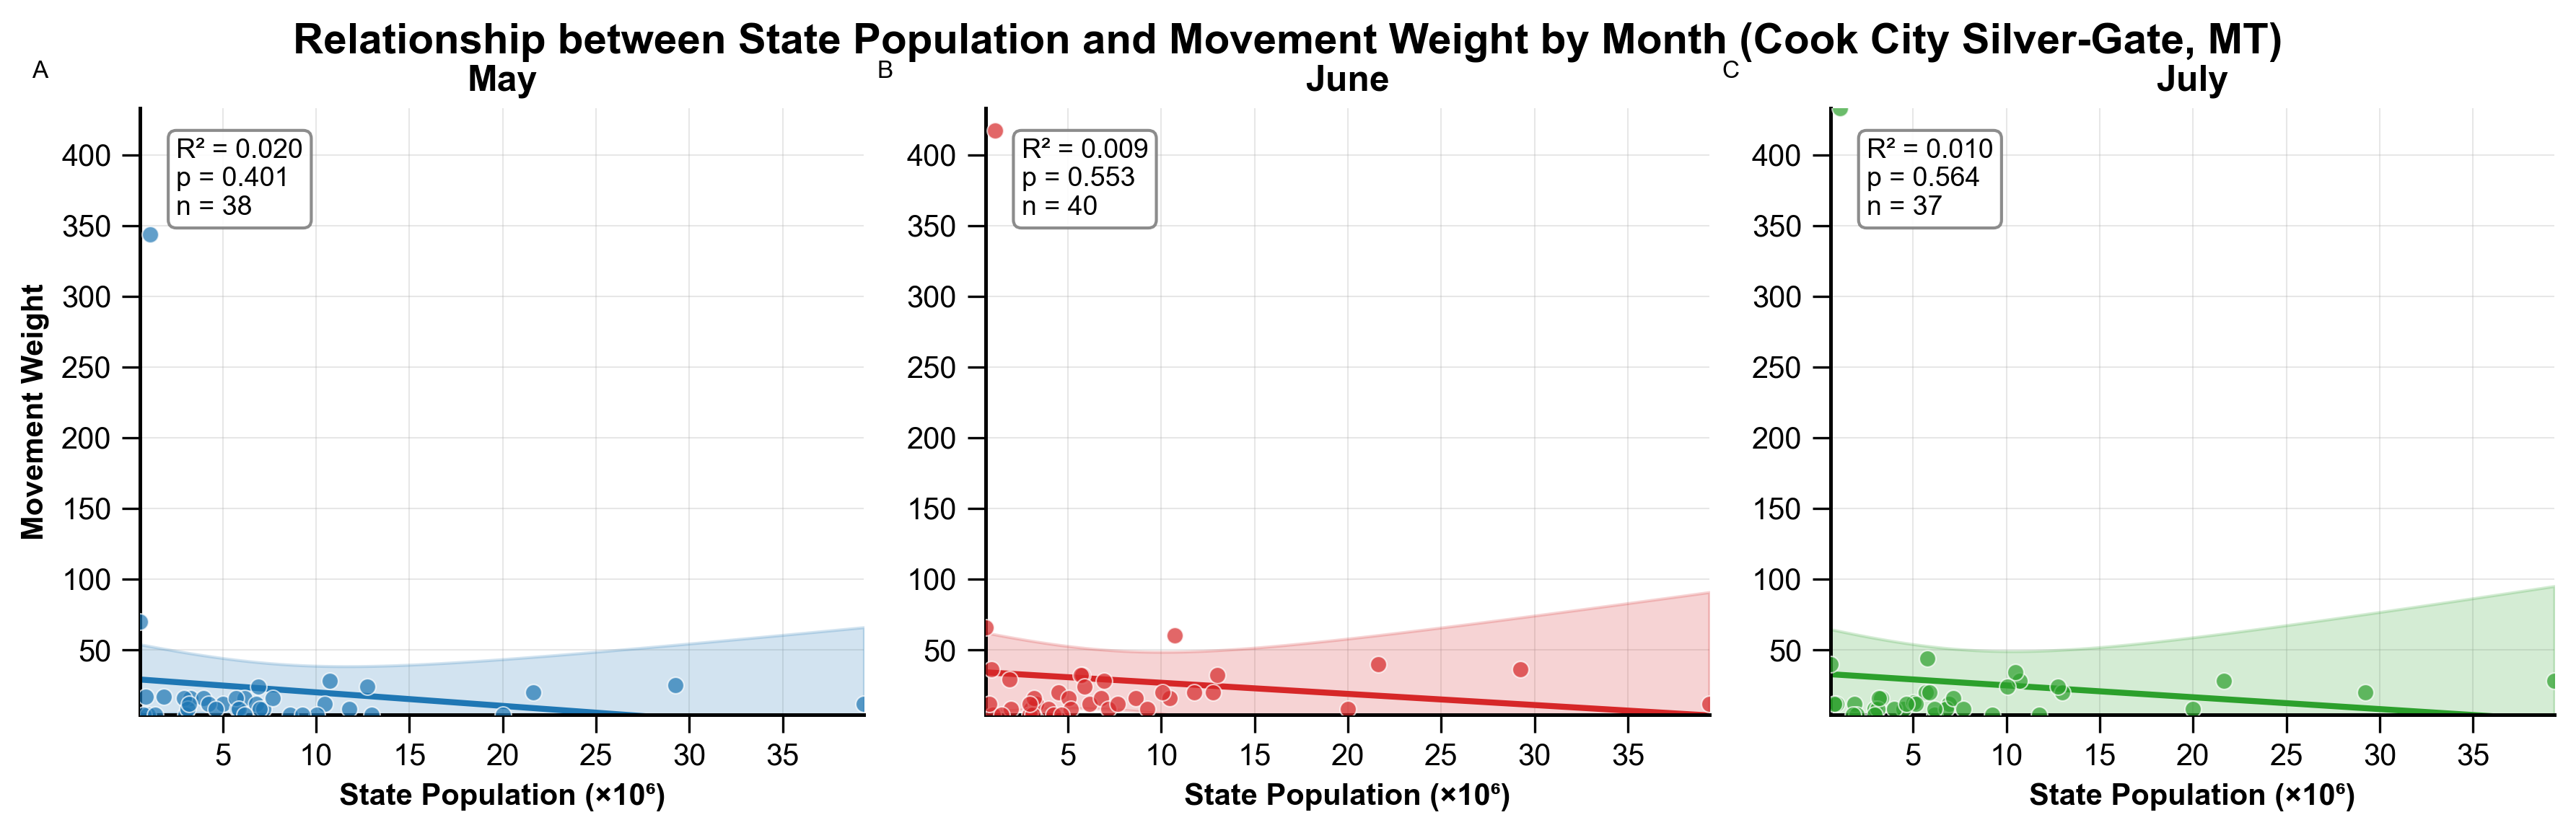

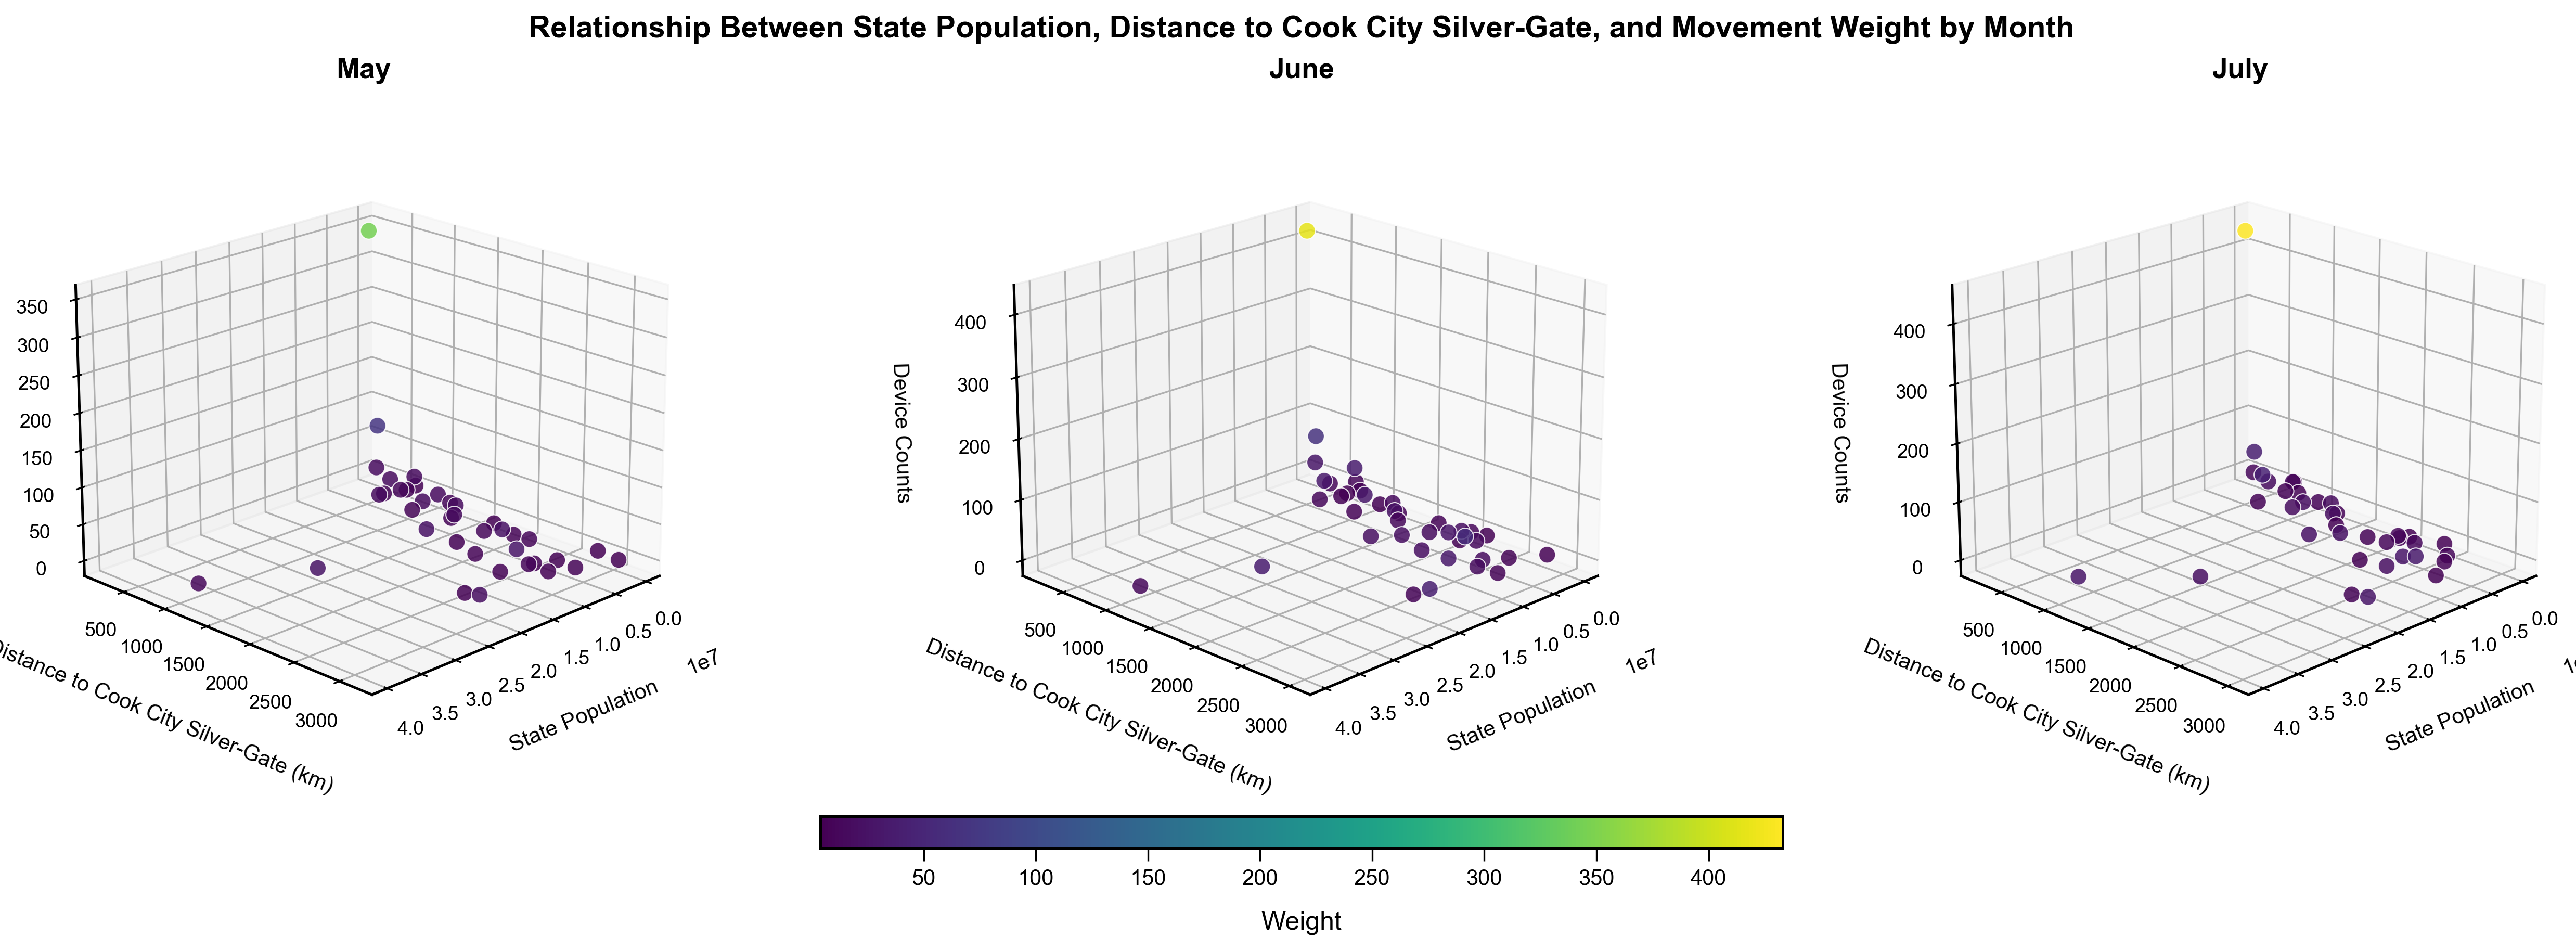

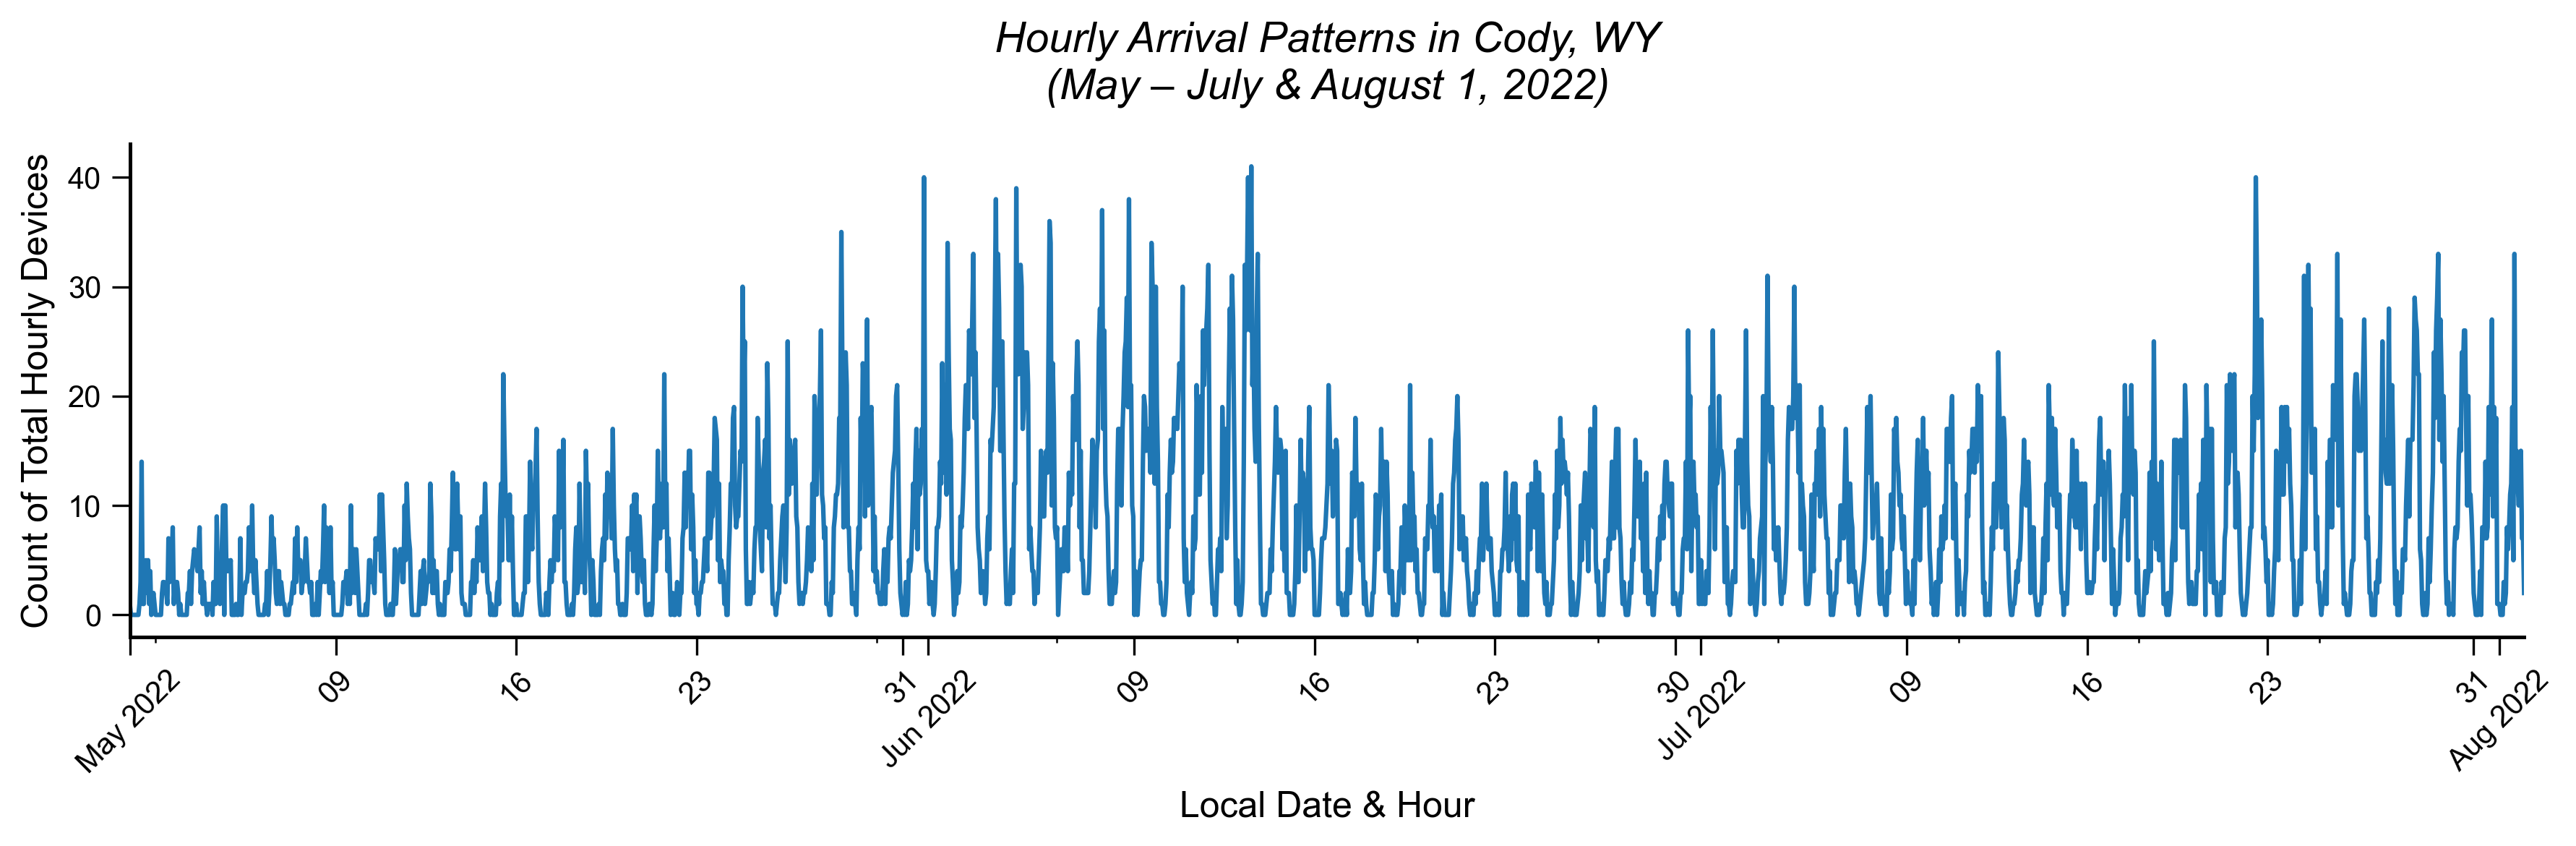

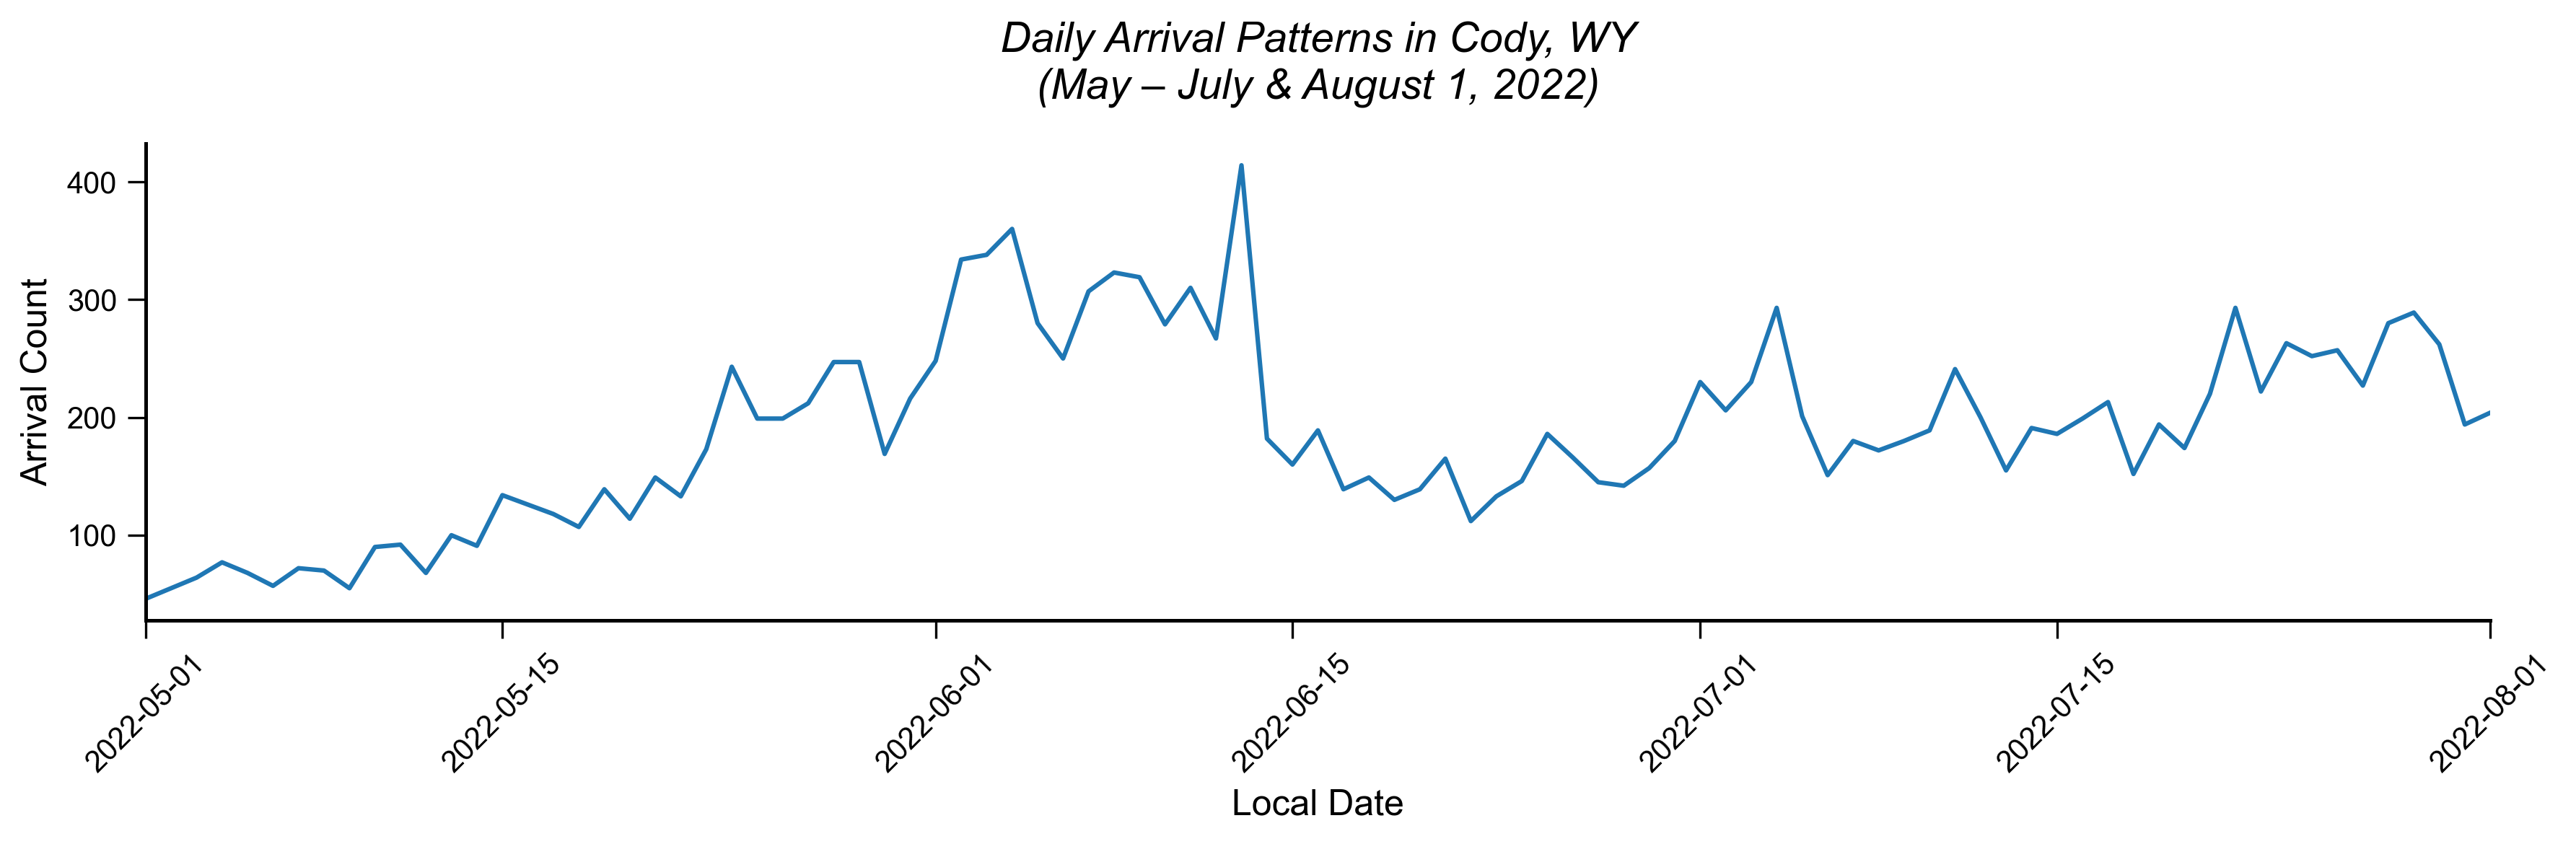

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

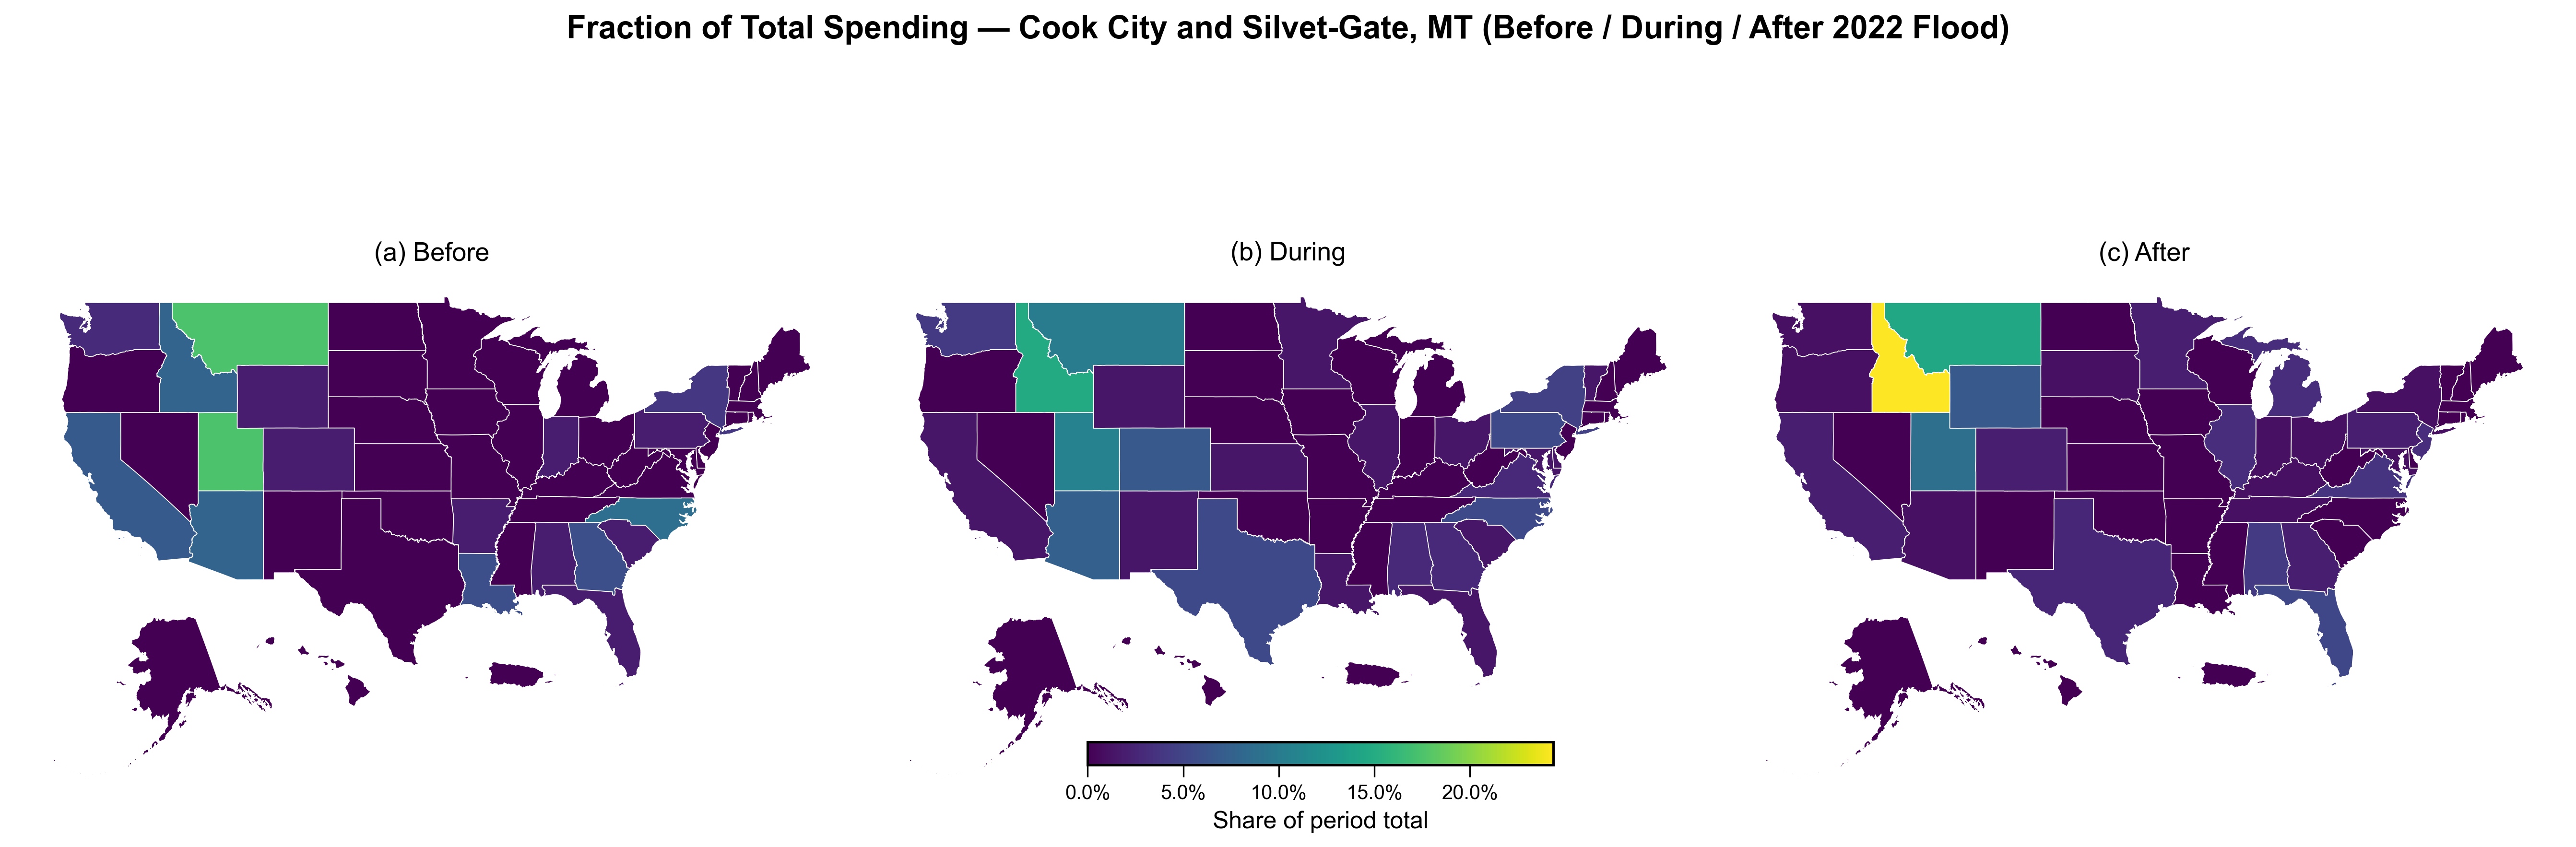

In [1]:
import sys
import geopandas as gpd
sys.path.append(r"F:\Yellow Stone Flood-2022\floodanalysis\Scripts")
import mo as mb 
import matplotlib.pyplot as plt

# Load both Wyoming and Montana CBGs
wy_mt_cbg = mb.load_blockgroups([mb.SHAPEFILE_WY_CBG, mb.SHAPEFILE_MT_CBG])

# Load both Wyoming and Montana mobility data
df_2022 = mb.load_advan([mb.ADVAN_CSV_WY, mb.ADVAN_CSV_MT], year=2022)

# Load State Population data
gdf_proj_states = mb.load_state_pop(mb.STATE_POP_FILE)

# Disable plt.show() only DURING pipeline execution 
_real_show = plt.show
plt.show = lambda *args, **kwargs: None

# Run pipeline for West Yellowstone, Montana
results = mb.run_full_pipeline_for_place(
    place_name=[
    "Cooke City, Park County, Montana, USA",
    "Silver Gate, Park County, Montana, USA"
],
    pretty_label="Cook City Silver-Gate, MT",
    geoid_prefixes=["30067"],  
    wy_cbg=wy_mt_cbg,
    df_2022=df_2022,
    gdf_proj_states=gdf_proj_states,
    exclude_geoids=['300679806001'],
    outdir="temp"  
)
# Delete unwanted figures
if "figs" in results:
    # Block the county-level flow map
    if "county_flow" in results["figs"]:
        plt.close(results["figs"]["county_flow"])

# Restore plt.show() 
plt.show = _real_show

# Hourly arrivals
hourly_fig, _ = mb.plot_hourly_series(results["hourly_series"], "Cody, WY")
plt.show()
plt.close(hourly_fig)

# Daily arrivals
daily_fig, _ = mb.plot_daily_series(results["daily_series"], "Cody, WY")
plt.show()
plt.close(daily_fig)

# County-level flow map 
if "figs" in results and "county_flow" in results["figs"]:
    plt.close(results["figs"]["county_flow"])

# State-level flow map 
if "figs" in results and "state_flow" in results["figs"]:
    fig_state = results["figs"]["state_flow"]
    plt.figure(fig_state.number)
    plt.show()
    plt.close(fig_state)

# Regression panel
if "figs" in results and "regression" in results["figs"]:
    fig_reg = results["figs"]["regression"]
    plt.figure(fig_reg.number)
    plt.show()
    plt.close(fig_reg)

# 3D scatter 
if "figs" in results and "scatter3d" in results["figs"]:
    fig_3d = results["figs"]["scatter3d"]
    plt.figure(fig_3d.number)
    plt.show()
    plt.close(fig_3d)

# Plotting the State of origin choropleth Mapping
us_states = gpd.read_file (mb.US_STATES_FILE).to_crs (epsg = 4326)
# Ensure proper format
us_states['STATEFP'] = us_states['STATEFP'].astype(str).str.zfill(2)
# Remove territories
drops = ['60', '66', '69', '78']
us_states= us_states [~us_states['STATEFP'].isin(drops)].copy()

# Analyze state origin for Cody
result_cody = mb.analyze_state_origin_for_place (
    csv_path =r'F:\Yellow Stone Flood-2022\floodanalysis\Data\States Population\cooke_city_silvergate_spending_origin.csv',
    us_states_gdf = us_states,
    place_label = 'Cook City and Silvet-Gate, MT',
    as_fraction = True,
    save_fig_path = 'temp/Cook_City_Silver_gate_origin.png'
)
plt.show()